In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Functions

In [50]:
def cleanTxt(txt):
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing R
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    txt = re.sub('\r\n', '', txt)
    txt = re.sub('amp', '', txt) # removing ampersand
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [4]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'data']
    txt_lst = [word for word in txt_lst if word != 'privacy']
    txt_lst = [word for word in txt_lst if word != 'u']
    return " ".join(txt_lst)

In [5]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [6]:
!pip install pycountry

In [7]:
!pip install pycountry
def findCountry(txt):
    loc = []
    for c in pycountry.countries:
        if c.name in txt:
            return c.name
        elif txt != 'global':
            return 'Unknown'

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent = "geoapiExercises")
geocode = RateLimiter(geolocator.geocode, max_retries=10000, swallow_exceptions=True, return_value_on_exception=None)
def findCountry(txt):
    if txt is np.nan:
        return 'Unknown'
    if txt.lower() == 'global': # maybe not needed
        return 'Global'
    try:
        x = geolocator.geocode(txt, )
        if x is None:
            return 'Unknown'
        loc = x.address.split(',')[-1]
        if loc[0] == " ":
            loc = loc[1:]
        return loc
    except:
        return 'Unknown'

In [8]:
def cluster_summary(ci, df):
    cluster = df[df.cluster_id==ci]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    return cluster_summary

In [9]:
# we can make a function that puts comparisons side by side so its easier for us to see in a data frame 

def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id, df2))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [10]:
def kmeans_cluster(df, n_clusters=2):
    """This function assigns clusters to every row in the dataframe via kmeans"""
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [11]:
def graph_summary_clustering(results):
    """this function produces a summary of the clusters"""
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

# Data Privacy Tweets

In [12]:
data = pd.read_csv('data_privacy_tweets.csv')

In [13]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1166589525386301440,x1404485195676459008,2021-06-14 17:05:39,privacy_issues,The @EFF finds that the proposed modifications...,TweetDeck,248,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
1,x1166589525386301440,x1403010409473449986,2021-06-10 15:25:22,privacy_issues,The European Parliament passes the new #EU #CO...,TweetDeck,223,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
2,x1166589525386301440,x1404185087093182465,2021-06-13 21:13:07,privacy_issues,To gain better control over the increasingly p...,TweetDeck,240,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
3,x1166589525386301440,x1401833811940306947,2021-06-07 09:30:00,privacy_issues,What if the consumers are on the driving seat ...,TweetDeck,255,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
4,x1166589525386301440,x1401555697163280387,2021-06-06 15:04:52,privacy_issues,"""Vera Jourová says new rules are needed to lim...",TweetDeck,230,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...


In [14]:
data.user_id.nunique()
# we hvae 7243 unique users here

7243

In [15]:
data.shape

(10637, 90)

In [16]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [17]:
df.head()

,text,is_quote,is_retweet,retweet_count,hashtags,followers_count
0,The @EFF finds that the proposed modifications...,False,False,0,COVID,406
1,The European Parliament passes the new #EU #CO...,False,False,0,EU COVID19 GDPR,406
2,To gain better control over the increasingly p...,False,False,0,China datasharing datasecurity,406
3,What if the consumers are on the driving seat ...,False,False,1,privacypolicy tech DataPrivacy innovation Priv...,406
4,"""Vera Jourová says new rules are needed to lim...",False,False,1,EU US,406


In [37]:
text = df[["text"]][:10000] # using subset for now so it will run faster
pd.set_option('display.max_colwidth', -1)
text.head()

,text
0,"The @EFF finds that the proposed modifications to the HIPAA would ""invade your most personal and intimiate health data."" \r\n\r\nStating that trust in healthcare is crucial and especially so during the #COVID pandemic.\r\n\r\nRead more: https://t.co/ReuoQ3mF9p"
1,The European Parliament passes the new #EU #COVID19 Certificate Regulation detailing peoples' COVID information.\r\n\r\nPromising that all personal data will be processed in line with the #GDPR\r\n\r\nRead more: https://t.co/8PGuChsV5F
2,"To gain better control over the increasingly powerful technology sector in #China, new regulations in China make it harder for big tech to refuse the government's request for #datasharing. \r\n\r\n#datasecurity\r\n\r\nRead more: https://t.co/piSfs3NW4J"
3,What if the consumers are on the driving seat to agree or disagree to the #privacypolicy of the #tech giants? Article by Beth Magnuson\r\nexplains #DataPrivacy &amp; #innovation on @VentureBeat \r\n\r\nhttps://t.co/n2pFOwWSmi\r\n\r\n#PrivacyTech #Technology #DataPrivacy
4,"""Vera Jourová says new rules are needed to limit the bulk collection of Europeans’ data.""\r\n\r\nThe #EU is requiring new legislation limiting #US government agencies from accessing European data. \r\n\r\nRead more at: https://t.co/04avhPjhCd"


# Data cleaning

In [38]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [39]:
text['text'] = text['text'].apply(cleanTxt)
text.head()

,text
0,the eff finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data stating that trust in healthcare is crucial and especially so during the covid pandemicread more
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid informationpromising that all personal data will be processed in line with the gdprread more
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing datasecurityread more
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnusonexplains dataprivacy innovation on venturebeat
4,vera jourová says new rules are needed to limit the bulk collection of europeans datathe eu is requiring new legislation limiting us government agencies from accessing european data read more at


In [40]:
text['text'] = text['text'].apply(stopWords)
text.head()

,text
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read


# Vectorizing Data

Vectorizing using Binary Term Frequency (https://towardsdatascience.com/getting-started-with-text-vectorization-2f2efbec6685). Binary Term Frequency captures presence (1) or absence (0) of term in document. For this part, under TfidfVectorizer, we set binary parameter equal to true so that it can show just presence (1) or absence (0) and norm parameter equal to false.

In [16]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5]

['eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread',
 'european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread',
 'gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread',
 'consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat',
 'vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read']

In [17]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [18]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,0001860173,007cybersecurity,01,010,0100,020,05,050,06,0613you,...,zoomecertificates,zoominfo,zootokenio,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# List of Words

In [22]:
dp_words = [] # dp for data privacy

for row in text['text']:
    for word in str(row).split(" "):
        dp_words.append(word)
        
dp_words[:5]

['eff', 'find', 'proposed', 'modification', 'hipaa']

In [23]:
len(dp_words)

150831

In [24]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in dp_words:
    fdist[word]+=1
fdist

FreqDist({'new': 1138, 'apple': 1069, 'security': 1060, 'user': 873, 'protection': 657, 'policy': 626, 'company': 620, 'personal': 610, 'law': 610, 'concern': 557, ...})

In [25]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

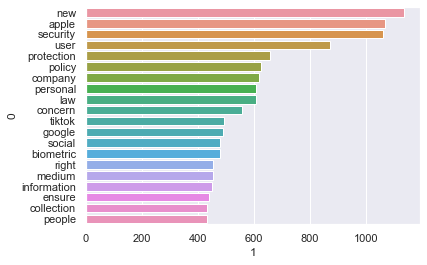

In [26]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [27]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
most_common

['new',
 'apple',
 'security',
 'user',
 'protection',
 'policy',
 'company',
 'personal',
 'law',
 'concern',
 'tiktok',
 'google',
 'social',
 'biometric',
 'right',
 'medium',
 'information',
 'ensure',
 'collection',
 'people']

# Clustering

In [57]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 35]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
CPU times: user 36min 18s, sys: 2min 53s, total: 39min 11s
Wall time: 12min 9s


In [58]:
results_k

{2: 141949.45404568248,
 3: 141110.51994312223,
 4: 137776.4877889466,
 5: 137315.98809609396,
 8: 134996.52206797528,
 10: 134171.47266535947,
 15: 132011.43657232297,
 20: 131258.625128351,
 25: 128766.85422258376,
 30: 129328.36580454999}

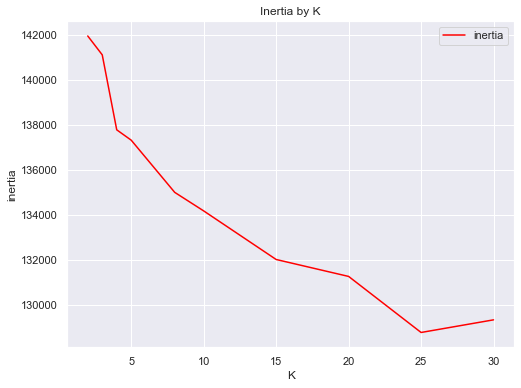

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();
# try 2, 3, 8 clusters.

## Cluster Analysis

In [52]:
estimator_kmeans = KMeans(random_state=42, n_clusters=4) # we're sticking with 4
estimator_kmeans.fit(text_vec)

KMeans(n_clusters=7, random_state=42)

In [53]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,0001860173,007cybersecurity,01,010,0100,020,05,050,06,0613you,...,zoominfo,zootokenio,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,0001860173,007cybersecurity,01,010,0100,020,05,050,06,0613you,...,zoomecertificates,zoominfo,zootokenio,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,1.0,0.0,1.0,6.0,9.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
text_clusters_20 = text_clusters[['new',
 'apple',
 'security',
 'user',
 'protection',
 'policy',
 'company',
 'personal',
 'law',
 'concern',
 'tiktok',
 'google',
 'social',
 'biometric',
 'right',
 'medium',
 'information',
 'ensure',
 'collection',
 'people']
]

text_clusters_20.head()

,new,apple,security,user,protection,policy,company,personal,law,concern,tiktok,google,social,biometric,right,medium,information,ensure,collection,people
cluster_id,,,,,,,,,,,,,,,,,,,,
0,26.0,0.0,8.0,118.0,1.0,155.0,3.0,4.0,7.0,0.0,147.0,0.0,18.0,139.0,0.0,8.0,16.0,0.0,14.0,0.0
1,677.0,0.0,876.0,434.0,497.0,237.0,445.0,455.0,467.0,350.0,67.0,316.0,114.0,35.0,0.0,110.0,296.0,107.0,127.0,332.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,145.0,0.0,0.0,312.0,0.0,0.0,312.0,0.0,311.0,0.0,0.0


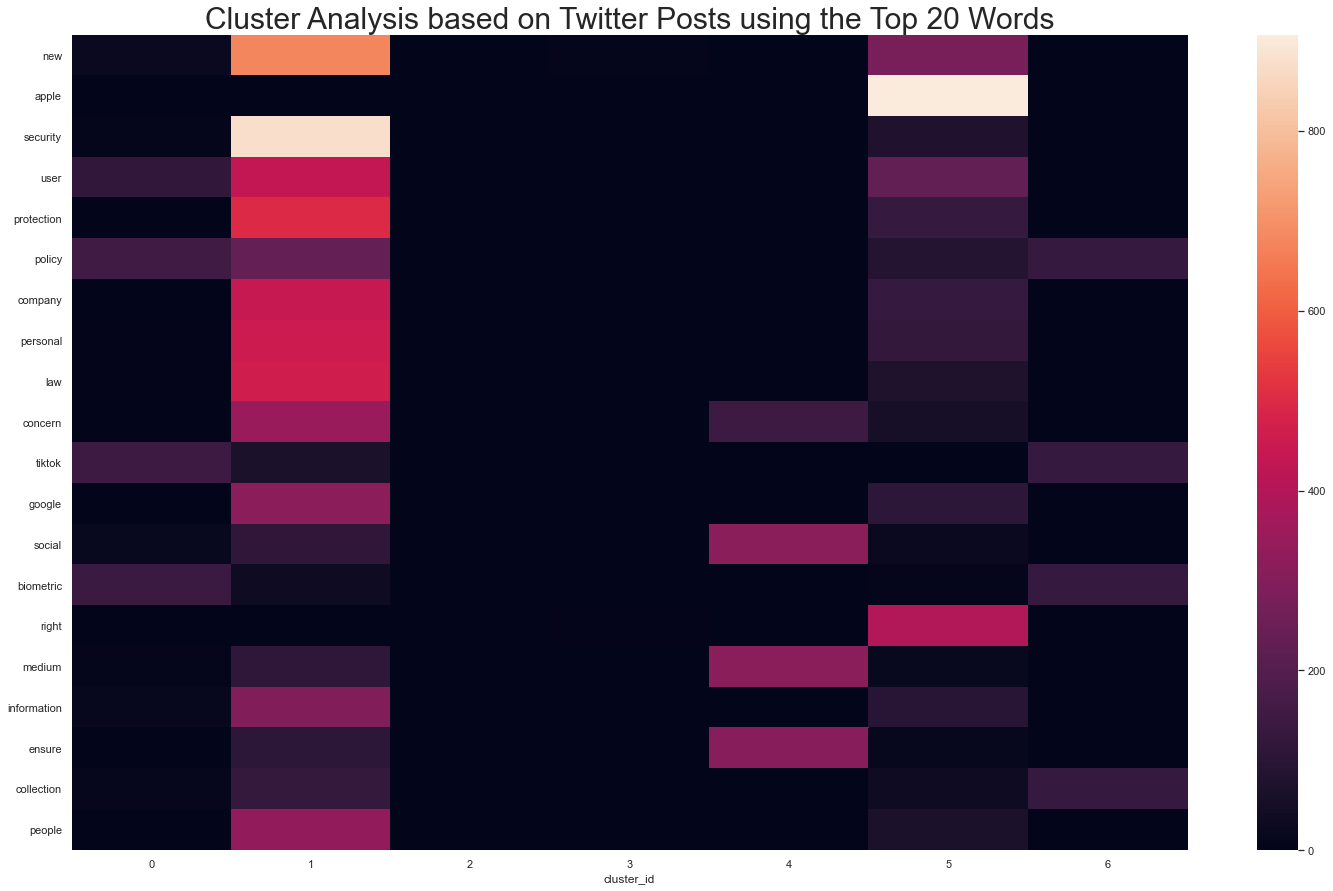

In [56]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);

# Sentiment Analysis

In [46]:
text_desc.drop('text', axis=1)

,description
0,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
1,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
2,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
3,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
4,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
...,...
10161,NaN
10162,"Dedicated to all of our fans who say, ‘love ko ‘to.’"
10163,"Instructional Consultant @uwmadison. Ph.D. in Lit Studies. Passionate about #OER, #openpedagogy, 19th c. participatory culture, and #SoTL. Opinions my own."
10164,<U+0001F4CD>|#MobileMarketing #MobileApps #FinTech & more\r\n<U+0001F4E1>|Frontline content and community events for mobile marketers \r\n<U+26D3>|Join the LARGEST community of mobile experts


In [47]:
text_desc["text"] = text['text']
text_desc.head()

,text,description
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.


In [44]:
text_desc["description"] = data[["description"]][:10000]
text_desc.head()

,text,description
0,"The @EFF finds that the proposed modifications to the HIPAA would ""invade your most personal and intimiate health data."" \r\n\r\nStating that trust in healthcare is crucial and especially so during the #COVID pandemic.\r\n\r\nRead more: https://t.co/ReuoQ3mF9p",bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
1,The European Parliament passes the new #EU #COVID19 Certificate Regulation detailing peoples' COVID information.\r\n\r\nPromising that all personal data will be processed in line with the #GDPR\r\n\r\nRead more: https://t.co/8PGuChsV5F,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
2,"To gain better control over the increasingly powerful technology sector in #China, new regulations in China make it harder for big tech to refuse the government's request for #datasharing. \r\n\r\n#datasecurity\r\n\r\nRead more: https://t.co/piSfs3NW4J",bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
3,What if the consumers are on the driving seat to agree or disagree to the #privacypolicy of the #tech giants? Article by Beth Magnuson\r\nexplains #DataPrivacy &amp; #innovation on @VentureBeat \r\n\r\nhttps://t.co/n2pFOwWSmi\r\n\r\n#PrivacyTech #Technology #DataPrivacy,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
4,"""Vera Jourová says new rules are needed to limit the bulk collection of Europeans’ data.""\r\n\r\nThe #EU is requiring new legislation limiting #US government agencies from accessing European data. \r\n\r\nRead more at: https://t.co/04avhPjhCd",bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.


In [48]:
text_desc = text_desc.dropna()

In [52]:
text_desc["description"] = text_desc["description"].apply(cleanTxt)

In [54]:
text_desc['description'] = text_desc['description'].apply(stopWords)

In [55]:
text_desc.head()

,text,description
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,bimonthly newsletter design product technology miranovatweet team open collabs info via dm
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,bimonthly newsletter design product technology miranovatweet team open collabs info via dm


In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
text_desc['scores'] = text_desc['text'].apply(lambda review: sid_obj.polarity_scores(review))

In [57]:
text_desc.head()

,text,description,scores
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}"
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}"
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}"
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [58]:
text_desc['compound']  = text_desc['scores'].apply(lambda score_dict: score_dict['compound'])
text_desc.head()

,text,description,scores,compound
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}",0.5106
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}",0.7845
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}",0.3612
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [59]:
text_desc['comp_score'] = text_desc['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))

text_desc.head()

,text,description,scores,compound,comp_score
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}",0.5106,pos
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}",0.7845,pos
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}",0.3612,pos
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [60]:
comp_score_counts = text_desc.comp_score.value_counts()
# weirdly a good chunk of them are actually postiive

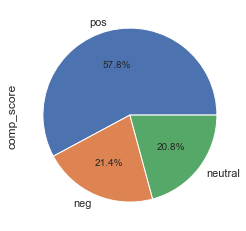

In [61]:
comp_score_counts.plot.pie(autopct="%.1f%%");

## Continued analysis including descriptions using `text_desc` dataframe
- news and opinion together
- security 
- 'tech', 'digital', 'business','technology','tweet','marketing','medium','service','law','world','view','solution','global','help','ai','software', 'cybersecurity'

### News, opinion

In [66]:
news_df = text_desc[text_desc['description'].str.contains('news') | text_desc['description'].str.contains('opinion')]
news_df.head()

,text,description,scores,compound,comp_score
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}",0.5106,pos
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}",0.7845,pos
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}",0.3612,pos
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,bimonthly newsletter design product technology miranovatweet team open collabs info via dm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [68]:
news_df.shape

(1487, 5)

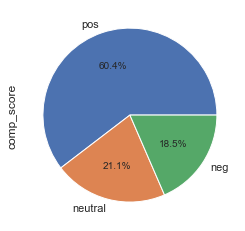

In [70]:
news_comp_score_counts = news_df.comp_score.value_counts()
news_comp_score_counts.plot.pie(autopct="%.1f%%");

### Security

In [75]:
security_df = text_desc[text_desc['description'].str.contains('security')]
security_df.head()

,text,description,scores,compound,comp_score
6,audi volkswagen owner may breached via rprivacy,gamer security blogger author bestvpnguru,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
7,uk government harvest medical without consent opt late link easily opt comment via rprivacy,gamer security blogger author bestvpnguru,"{'neg': 0.104, 'neu': 0.747, 'pos': 0.149, 'compound': 0.1862}",0.1862,pos
8,even know password breachleak checker service collecting every single user via rprivacy,gamer security blogger author bestvpnguru,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
9,access personal open source code via rprivacy,gamer security blogger author bestvpnguru,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
10,mcdonalds discloses breach theft customer employee info via rprivacy,gamer security blogger author bestvpnguru,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [76]:
security_df.shape

(989, 5)

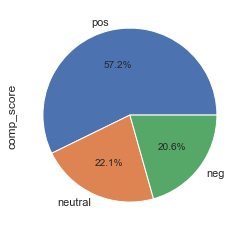

In [77]:
security_comp_score_counts = security_df.comp_score.value_counts()
security_comp_score_counts.plot.pie(autopct="%.1f%%");

### Anything (just input a word and look at the pie chart)

In [85]:
any_df = text_desc[text_desc['description'].str.contains('law')]
any_df.head()

,text,description,scores,compound,comp_score
29,new policy tiktok may collect biometric user representative app declined detail regarding usage click link learn,specializing corporate ecommerce law offering legal support forwardthinking business want comfort knowing theyre protected,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
650,thank nejm subscribergating article leak deidentified ehr heaven know bar prep doesnt need exposed interesting topic time,cippus cippe cissp mouse og ops infra lateonset law student firstgen lawyerswhocode,"{'neg': 0.197, 'neu': 0.507, 'pos': 0.297, 'compound': 0.3322}",0.3322,pos
651,top golf reached proposed 26 million settlement former employee illinois sued use fingerprint company timekeeping system,lawyer find legal news analysis trust scotus u2696 listen subscribe podcasts u27a1ufe0f,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.296}",0.2960,pos
652,top golf reached proposed 26 million settlement former employee illinois sued use fingerprint company timekeeping system,lawyer find legal news analysis trust scotus u2696 listen subscribe podcasts u27a1ufe0f,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.296}",0.2960,pos
653,facebook ordered face claim effort stop israeli advertising company scraping practice crossed line unlawful interference business,lawyer find legal news analysis trust scotus u2696 listen subscribe podcasts u27a1ufe0f,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}",-0.2960,neg


In [86]:
any_df.shape

(430, 5)

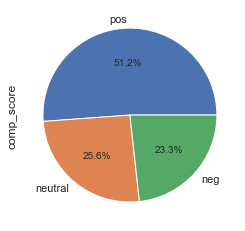

In [87]:
any_comp_score_counts = any_df.comp_score.value_counts()
any_comp_score_counts.plot.pie(autopct="%.1f%%");

# Word Cloud

In [295]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

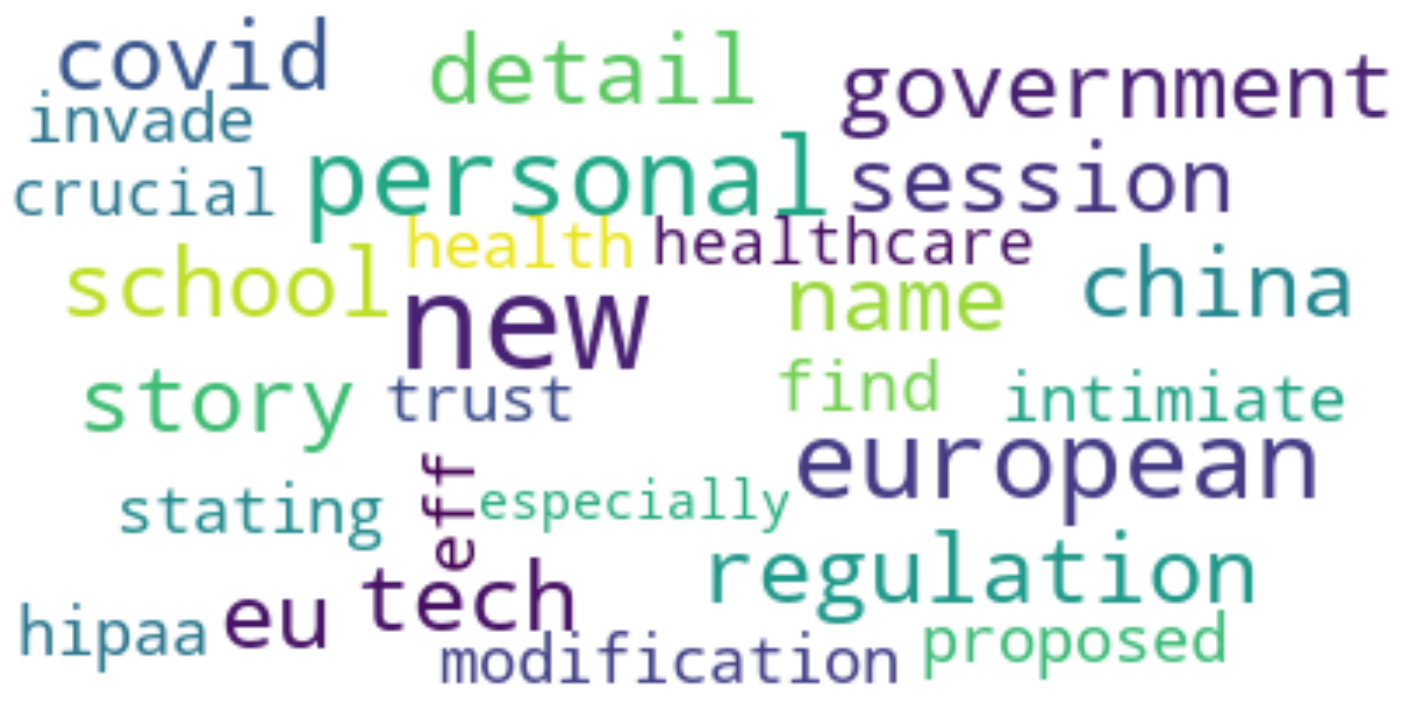

In [297]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(text['text'])
wc = WordCloud(
         background_color="white", max_words=2000,
         min_font_size =15, max_font_size=40, relative_scaling =
         0.5, stopwords=new_stopwords,normalize_plurals= True)
import re
textonly = re.sub("", "",str(text['text']))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#Show the wordcloud
plt.show()

#have to change the code a little; the original one does not cause error but count compound/pos/neg/neutral into the cloud -Shuwen